In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE

# Train test counter

In [2]:
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.dayofyear
df = df.drop(df.index[-1])
# replacement_dict = {'Non': 0, 'NPF': 1, 'undefined': 2}
# df['day.type'] = df['day.type'].replace(replacement_dict)

X = df.drop(columns=["day.type"])
y = df["day.type"]
value_counts = y.value_counts()
# print(y)
smote = SMOTE(sampling_strategy='auto')
X, y = smote.fit_resample(X, y)
value_counts = y.value_counts()
# print(y)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
y_train_value_counts = y_train.value_counts()
y_test_value_counts = y_test.value_counts()
print('y_train')
print(y_train_value_counts)
print('------------------------------------------------------------------------')
print('y_test')
print(y_test_value_counts)
print(y)

y_train
day.type
Non          620
undefined    620
NPF          620
Name: count, dtype: int64
------------------------------------------------------------------------
y_test
day.type
Non          155
undefined    155
NPF          155
Name: count, dtype: int64
0             Non
1             Non
2             Non
3             Non
4             Non
          ...    
2320    undefined
2321    undefined
2322    undefined
2323    undefined
2324    undefined
Name: day.type, Length: 2325, dtype: object


# Day.type counter

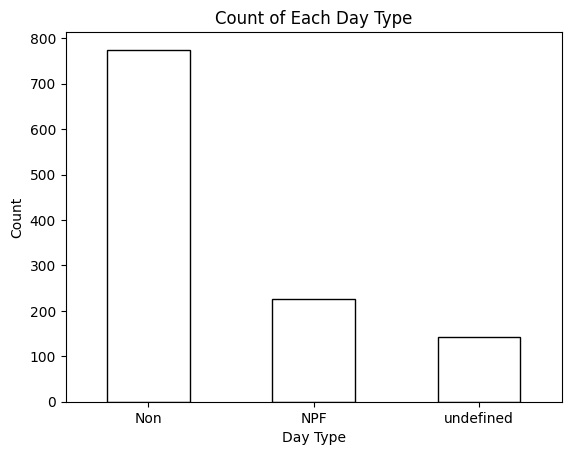

In [3]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
day_type_counts = df['day.type'].value_counts()
day_type_counts.plot(kind='bar', color='white', edgecolor='black')
plt.title('Count of Each Day Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\count_day.type.png', dpi=300)

# Day.type count

<Figure size 1200x700 with 0 Axes>

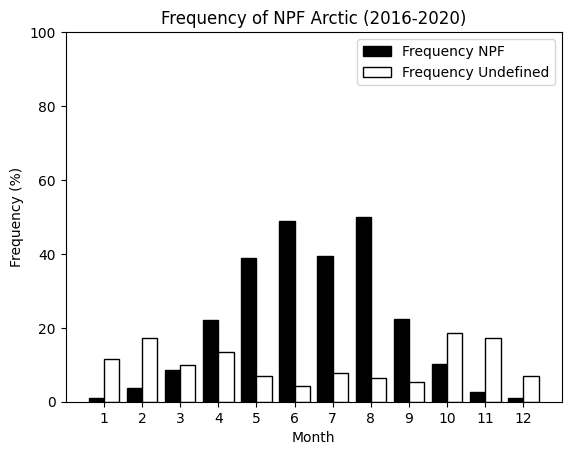

In [4]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')

# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Group by month and calculate counts
grouped = df.groupby('month')['day.type'].value_counts().unstack(fill_value=0)
grouped = grouped.reindex(range(1, 13), fill_value=0)  # Ensure all 12 months are present

# Calculate the percentages for 'NPF' and 'undefined'
grouped['Frequency NPF'] = (grouped['NPF'] / grouped.sum(axis=1)) * 100
grouped['Frequency Undefined'] = (grouped['undefined'] / grouped.sum(axis=1)) * 100

# Prepare data for grouped bar plot
plot_data = grouped[['Frequency NPF', 'Frequency Undefined']]

# Plotting
plt.figure(figsize=(12, 7))
ax = plot_data.plot(kind='bar', width=0.8, color=['black', 'white'], edgecolor='black')

# Remove legend title
ax.legend(title=None)

# Adjust the plot aesthetics
plt.title('Frequency of NPF Arctic (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Frequency (%)')
plt.xticks(ticks=range(12), labels=[f'{i}' for i in range(1, 13)], rotation=0)
plt.ylim(0, 100)
plt.xlim(-1, 12)

# Save the plot
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\count_day.type_month.png', dpi=300)
plt.show()

# Pressure

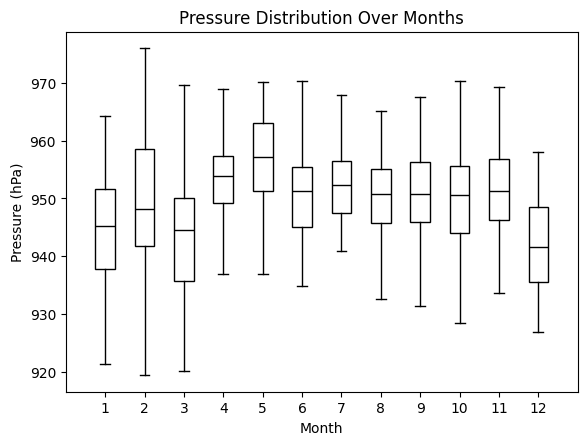

In [5]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = pd.Categorical(df['month'], categories=range(1, 13), ordered=True)
boxplot = df.boxplot(column='pressure', by='month', patch_artist=True, 
                     boxprops=dict(facecolor='white', edgecolor='black'),
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'),
                     showfliers=False)

plt.title('Pressure Distribution Over Months')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Pressure (hPa)')
plt.xticks(ticks=range(1, 13), labels=[f'{i}' for i in range(1, 13)], rotation=0)
plt.xlim(0, 13)
plt.grid(False)
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\P_day.png', dpi=300)
plt.show()

# Relative Humidity

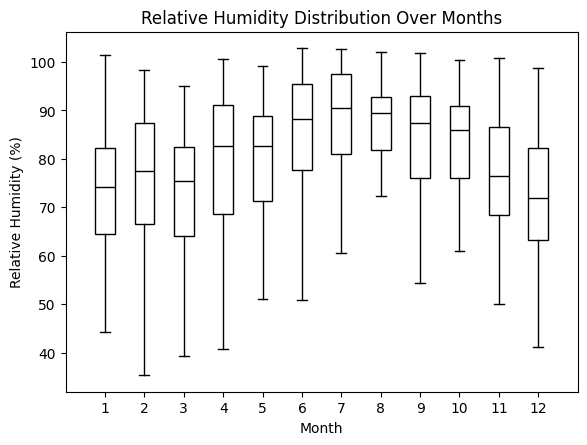

In [6]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')

df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = pd.Categorical(df['month'], categories=range(1, 13), ordered=True)
boxplot = df.boxplot(column='RH', by='month', patch_artist=True, 
                     boxprops=dict(facecolor='white', edgecolor='black'),
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'), 
                     showfliers=False)

plt.title('Relative Humidity Distribution Over Months')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.xticks(ticks=range(1, 13), labels=[f'{i}' for i in range(1, 13)], rotation=0)
plt.xlim(0, 13)
plt.grid(False)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\RH_day_smooth.png', dpi=300)
plt.show()

# Temperature

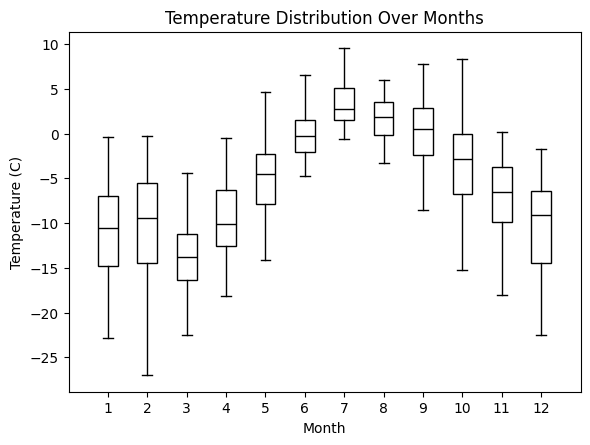

In [7]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')

df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = pd.Categorical(df['month'], categories=range(1, 13), ordered=True)
boxplot = df.boxplot(column='temperature', by='month', patch_artist=True, 
                     boxprops=dict(facecolor='white', edgecolor='black'),
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'),
                     showfliers=False)

plt.title('Temperature Distribution Over Months')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.xticks(ticks=range(1, 13), labels=[f'{i}' for i in range(1, 13)], rotation=0)
plt.xlim(0, 13)
plt.grid(False)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\T_day_smooth.png', dpi=300)
plt.show()

# Solar Radiation

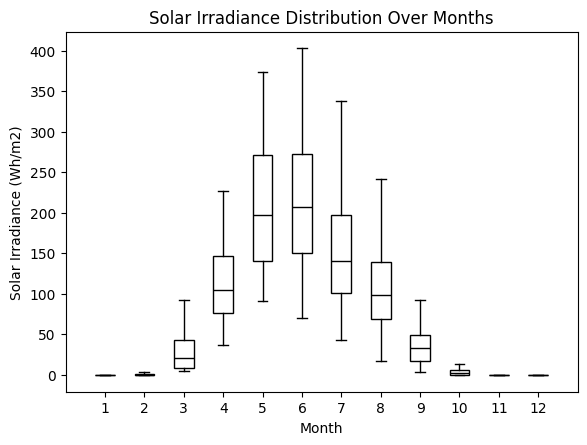

In [9]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\in_progress\\output_combined.csv')

df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = pd.Categorical(df['month'], categories=range(1, 13), ordered=True)
boxplot = df.boxplot(column='SWD', by='month', patch_artist=True, 
                     boxprops=dict(facecolor='white', edgecolor='black'),
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'),
                     showfliers=False)

plt.title('Solar Irradiance Distribution Over Months')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Solar Irradiance (Wh/m2)')
plt.xticks(ticks=range(1, 13), labels=[f'{i}' for i in range(1, 13)], rotation=0)
plt.xlim(0, 13)
plt.grid(False)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\SRAD_day_smooth.png', dpi=300)
plt.show()